In [1]:
from google.colab  import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import nltk
from nltk.corpus import stopwords
import string
%matplotlib inline
from sklearn import preprocessing
from scipy.stats import zscore
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [3]:
path = '/content/drive/Shareddrives/TeamProject-StrategicBusinessIT&ProblemSolving/dataset-SpamSMS.csv'
dataset_spam = pd.read_csv(path)
dataset_spam.head()

,type,text
0,ham,Hope you are having a good week. Just checking in
1,ham,K..give back my thanks.
2,ham,Am also doing in cbe only. But have to pay.
3,spam,"complimentary 4 STAR Ibiza Holiday or £10,000 ..."
4,spam,okmail: Dear Dave this is your final notice to...


In [4]:
#print the shape (get the number of rows and columns of the dataset)
dataset_spam.shape

(15698, 2)

In [5]:
#get the column names
dataset_spam.columns

Index(['type', 'text'], dtype='object')

In [6]:
dataset_spam.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15698 entries, 0 to 15697
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    15698 non-null  object
 1   text    15698 non-null  object
dtypes: object(2)
memory usage: 245.4+ KB


In [7]:
#check for duplicates rows and remove or drop them later
dataset_spam.drop_duplicates (inplace= True)

In [8]:
#show the new shape of the data, meaning the new number of rows and columns
dataset_spam.shape

(9882, 2)

In [9]:
#show number of missing data for each column (NAN, NaN, na)
dataset_spam.isnull().sum()

type    0
text    0
dtype: int64

In [10]:
#download the stopwords package
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

###We are going to use stopwords within the function that we are going to create, and this function will be used to process the text.
###Stopwords in natural language processing are useless words or data

In [11]:
def process_text(text):

  #1 remove punctuation
  #2 remove stopwords
  #3 return a list of clean text words

  #1. I created a variable called nopunc which is the short for no punctuation, this line will remove punctuation and store the new text in nopunc variable
  nopunc = [char for char in text if char not in string.punctuation]
  nopunc = ''.join(nopunc)

  #2
  clean_words = [word for word in nopunc.split() if word.lower() not in stopwords.words('english')]

  #3
  return clean_words


## **Tokenisation**

In [12]:
#show tokenisation which separetes words by commas (it shows a list of tokens also called lemmas)
#text is the text column, the messages of the data
dataset_spam['text'].head().apply(process_text)

0                         [Hope, good, week, checking]
1                                [Kgive, back, thanks]
2                                     [also, cbe, pay]
3    [complimentary, 4, STAR, Ibiza, Holiday, £1000...
4    [okmail, Dear, Dave, final, notice, collect, 4...
Name: text, dtype: object

###The next cell shows how i am going to prepare the data for training on the classifier which means that it will show how to process this text to be able to put it into a model to then make predictions to detect whether or not that sms is spam

In [13]:
#example
message4 = 'week week week good good checking'
message5 = 'final final final final collect checking'
print(message4)
print(message5)
print()

#convert the text to a matrix of token counts
from sklearn.feature_extraction.text import CountVectorizer
bow4 = CountVectorizer(analyzer=process_text).fit_transform([[message4], [message5]] )
print(bow4)
print()
#this line prints the 2 rows 5 columns
print(bow4.shape)


week week week good good checking
final final final final collect checking

  (0, 4)	3
  (0, 3)	2
  (0, 0)	1
  (1, 0)	1
  (1, 2)	4
  (1, 1)	1

(2, 5)


In [14]:
#convert a collection of text to a matrix of tokens
from sklearn.feature_extraction.text import CountVectorizer
message_bow = CountVectorizer(analyzer= process_text).fit_transform(dataset_spam['text'])

In [15]:
#Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(message_bow, dataset_spam['type'], test_size=0.20, random_state= 0)

In [16]:
#get the shape of message_bow (with 9882 rows and 21125 columns)
message_bow.shape


(9882, 21125)

# **Naive Bayes classification**
Naïve Bayes algorithm is a supervised learning algorithm, which is based on Bayes theorem and used for solving classification problems. It is a probabilistic classifier, which means it predicts on the basis of the probability of an object. 

In [17]:
#create and train the Naive Bayes Clasifier
from sklearn.naive_bayes import MultinomialNB
classifier = MultinomialNB().fit(X_train, y_train)

In [18]:
#Print the predictiones
print(classifier.predict(X_train))

#Print the actual values
print(y_train.values)
print(y_train)

['ham' 'ham' 'ham' ... 'spam' 'spam' 'ham']
['ham' 'ham' 'ham' ... 'spam' 'spam' 'ham']
15354     ham
11918     ham
1134      ham
14249     ham
8101      ham
         ... 
14944     ham
5223     spam
3442     spam
15651    spam
2867      ham
Name: type, Length: 7905, dtype: object


### Another method that can help us to determinate how good this model is

In [19]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_train)
print(classification_report(y_train, pred))
print()
#it prints the confusion matrix of the data
print('Confusion Matrix: \n', confusion_matrix(y_train, pred))
print()
print('Accuracy: ', accuracy_score(y_train, pred))

              precision    recall  f1-score   support

         ham       0.99      0.99      0.99      6427
        spam       0.94      0.97      0.96      1478

    accuracy                           0.98      7905
   macro avg       0.97      0.98      0.97      7905
weighted avg       0.98      0.98      0.98      7905


Confusion Matrix: 
 [[6338   89]
 [  40 1438]]

Accuracy:  0.9836812144212523


###Now we see what the model does to a test data

In [20]:
#Print the predictiones
print(classifier.predict(X_test))

#Print the actual values
print(y_test.values)
print(y_test)

['ham' 'ham' 'ham' ... 'spam' 'spam' 'ham']
['ham' 'ham' 'ham' ... 'spam' 'spam' 'ham']
663       ham
6602      ham
2004      ham
14146     ham
2839      ham
         ... 
14286     ham
11962     ham
12049    spam
3498     spam
4005      ham
Name: type, Length: 1977, dtype: object


In [21]:
#Evaluate the model on the training data set
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
pred = classifier.predict(X_test)
print(classification_report(y_test, pred))
print()
#it prints the confusion matrix of the data
print('Confusion Matrix: \n', confusion_matrix(y_test, pred))
print()
print('Accuracy: ', accuracy_score(y_test, pred))

              precision    recall  f1-score   support

         ham       0.99      0.94      0.96      1619
        spam       0.78      0.94      0.85       358

    accuracy                           0.94      1977
   macro avg       0.88      0.94      0.91      1977
weighted avg       0.95      0.94      0.94      1977


Confusion Matrix: 
 [[1523   96]
 [  23  335]]

Accuracy:  0.939807789580172


### In the previous cell it is shown that the model on the testing data is not as accurate as it was on the training data with "Accuracy: 0.9836812144212523". It can only go up to 1 which is 100% , still 0.9398 is close enough.

The following step is to gather some information about different columns in our DataFrame. We can do so by using .info(), which basically gives us information about the number of rows, columns, column data types, memory usage, etc. The columns with object dtype are the categorical variables in our dataset.

In [22]:
print(dataset_spam.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9882 entries, 0 to 15697
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   type    9882 non-null   object
 1   text    9882 non-null   object
dtypes: object(2)
memory usage: 231.6+ KB
None


In [23]:
dataset_spam["type"].unique()

array(['ham', 'spam'], dtype=object)

#Separating the dataset for the algorithms.

In [24]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
#from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier

In [32]:
#dataset_spam_array = dataset_spam.values
#X = dataset_spam_array[:, 1:2]
#y = dataset_spam_array[:, 0]
#X_train, X_validation, Y_train, Y_validation = train_test_split(X, y, test_size=0.20, random_state=1)
X_validation = X_test
Y_train= y_train
Y_validation = y_test 
classification_models = []
classification_models.append(('LOGISTIC', LogisticRegression(solver='liblinear', multi_class='ovr')))
classification_models.append(('NEIGHBOR', KNeighborsClassifier()))
classification_models.append(('TREE', DecisionTreeClassifier()))
classification_models.append(('NAIVEBAYES', MultinomialNB()))
classification_models.append(('VECTOR', SVC(gamma='auto')))
classification_models.append(('FOREST',RandomForestClassifier(n_estimators=50, random_state=1, max_features = 'sqrt', n_jobs=-1, verbose = 1)))


In [33]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    6.0s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    6.5s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.4s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:    5.9s finished
[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  46 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done  50 out of  50 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:    5.3s
[Parallel(n_jobs=-1)]:

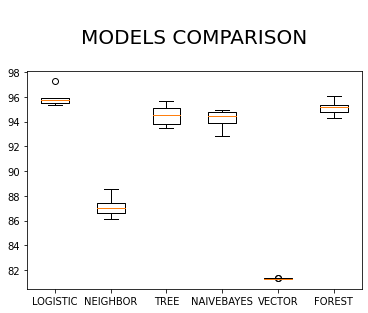

,LOGISTIC,NEIGHBOR,TREE,NAIVEBAYES,VECTOR,FOREST
Accuracy(%),95.888503,87.096587,94.497008,94.193466,81.302974,95.116896
STD,0.557392,0.723989,0.718254,0.730338,0.042898,0.490957


In [34]:
results = []
algorithms = []
cv_results_mean = []
cv_results_std = []
for algorith, model in classification_models:
    kfold = StratifiedKFold(n_splits = 8, random_state = 1, shuffle = True)
    cv_results = (cross_val_score(model, X_train, Y_train, cv=kfold, scoring='accuracy'))*100
    results.append(cv_results)
    algorithms.append(algorith)
    cv_results_mean.append(cv_results.mean())
    cv_results_std.append(cv_results.std())

Accuracy_chart_data = [cv_results_mean, cv_results_std]
Accuracy_chart = pd.DataFrame(Accuracy_chart_data, columns = algorithms, index = ['Accuracy(%)', 'STD'])
  
plt.boxplot(results, labels = algorithms)
plt.title('\nMODELS COMPARISON\n'.upper(), loc='center', fontsize = 20)
plt.show()

Accuracy_chart